In [1]:
#objective
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
#Load Dataset
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)
#Number of data in training set=2000
#Number of data in test set=400
# every image is of 100*100 pix and 3 for RGB channels

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


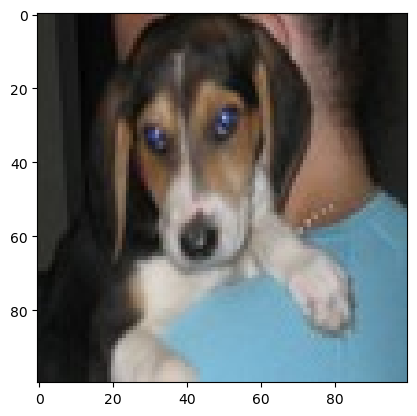

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [6]:
#Model
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

#The layers are going to be stakced up into sequence
#Conv2D(no of filters,size of filter,activation function,input shape)//input shape is only for 1st layer
#MaxPooling2D(filter size) //layer
#Conv2D
#Dense(no of neurons that we want to keep in that layer,activation fun)  // fully connected layer
#Dense(1(for binary classification we need only one neuron),cativation function = sigmoid (for binary classifica tion)//final fully connected layer (ouptut layer)

In [7]:
#add cost function and backpropagation algo with compile
#compile(loss type,)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
#trainning of data
#loss will decrease
#accuracy will increase
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 17s 453ms/step - loss: 0.7506 - accuracy: 0.5255
Epoch 2/5
32/32 [==============================] - 14s 441ms/step - loss: 0.6897 - accuracy: 0.5290
Epoch 3/5
32/32 [==============================] - 14s 449ms/step - loss: 0.6690 - accuracy: 0.6060
Epoch 4/5
32/32 [==============================] - 15s 457ms/step - loss: 0.6167 - accuracy: 0.6580
Epoch 5/5
32/32 [==============================] - 15s 453ms/step - loss: 0.5765 - accuracy: 0.6960


In [9]:
#evaluation of test dataset
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 69ms/step - loss: 0.5866 - accuracy: 0.7075


[0.5865942239761353, 0.7074999809265137]

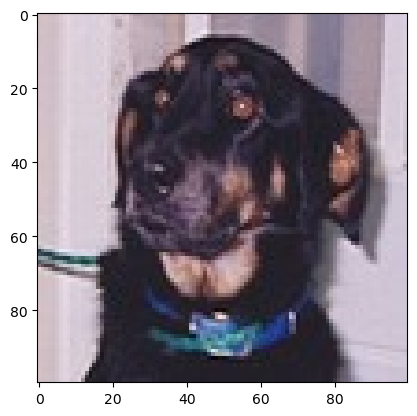

1/1 [==============================] - 0s 271ms/step
Our model says it is a : dog


In [10]:
#Making predictions
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
#if y_pred > 0.5 consider it as 1
#if y_pred < 0.5 consider it as 0
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)